In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [94]:
df = pd.read_csv('Protenus Sales Training Data.csv')

In [95]:
#print first 5 rows
df.head()

,Snapshot_Date,Opportunity_ID,Opportunity_Stage,Opportunity_Type,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Opportunity_Product,Account_Electronic_Medical_Record_System,Account_Hospital_Type,Account_Fiscal_Year_End,Account_State,Account_Zip_Code,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue
0,10/1/19,0064100000TL1Fw,Stage 3 - Pricing,New Business,NaN,9/12/18,11/12/19,Diversion Monitoring,Epic,Childrens Hospital,12/31/23,OH,43205.0,2.0,694.0,2196.0,7282.0,85077078.0,3.652792e+09,2.048661e+09
1,10/1/19,0064100000TKWAx,Stage 3 - Pricing,New Business,NaN,9/7/18,12/12/19,Privacy Monitoring,Epic,Health System,NaN,HI,96813.0,4.0,602.0,1829.0,4443.0,-242188.0,3.560499e+09,1.340713e+09
2,10/1/19,0064100000TKw69,Stage 2 - Scoping,New Business,NaN,9/11/18,4/15/20,Diversion Monitoring,Epic,Health System,NaN,MI,49503.0,10.0,1901.0,4000.0,NaN,982985681.0,7.869236e+09,3.290488e+09
3,10/1/19,0064100000TK0q9,Stage 2 - Scoping,New Business,NaN,8/29/18,2/22/20,Diversion Monitoring,Epic,Health System,NaN,OH,43604.0,12.0,1594.0,2481.0,NaN,165601560.0,1.075654e+10,2.468940e+09
4,10/1/19,0064100000QhXXx,Stage 3 - Pricing,New Business,NaN,6/26/18,12/10/19,Privacy Monitoring,Epic,Health System,NaN,WI,53226.0,10.0,1259.0,2666.0,8197.0,20765609.0,1.024796e+10,3.881722e+09


In [96]:
# Display the number of rows in the DataFrame
rows = df.shape[0]
print(f"The DataFrame has {rows} rows.")

The DataFrame has 8844 rows.


In [97]:
# Print specific row
specific_row = df.iloc[8000]
print(specific_row)

Snapshot_Date                                             1/1/23
Opportunity_ID                                   0061K00000hwfqe
Opportunity_Stage                              Stage 3 - Pricing
Opportunity_Type                                    New Business
Opportunity_Annual_Amount                            119357.5453
Opportunity_Created_Date                                 7/30/21
Opportunity_Close_Date                                  12/31/23
Opportunity_Product                         Diversion Monitoring
Account_Electronic_Medical_Record_System                    Epic
Account_Hospital_Type                              Health System
Account_Fiscal_Year_End                                      NaN
Account_State                                                 MI
Account_Zip_Code                                         48602.0
Account_Number_of_Hospitals                                  3.0
Account_Number_of_Beds                                     754.0
Account_Number_of_Affilia

In [98]:
# Print the row where "Opportunity_ID" is "0064100000TKWAx"
# for one ID we see all the differnt opportunity stages it went.
# for this it went from stage3 to stage 5
#they WON
specific_row = df.loc[df['Opportunity_ID'] == '0064100000TKWAx']
print(specific_row)


    Snapshot_Date   Opportunity_ID       Opportunity_Stage Opportunity_Type  \
1         10/1/19  0064100000TKWAx       Stage 3 - Pricing     New Business   
118       11/1/19  0064100000TKWAx       Stage 3 - Pricing     New Business   
248       12/1/19  0064100000TKWAx       Stage 3 - Pricing     New Business   
415        3/1/20  0064100000TKWAx  Stage 4 - Verbal / VOC     New Business   
568        4/1/20  0064100000TKWAx   Stage 5 - Contracting     New Business   
728        5/1/20  0064100000TKWAx              Closed Won     New Business   

     Opportunity_Annual_Amount Opportunity_Created_Date  \
1                          NaN                   9/7/18   
118                        NaN                   9/7/18   
248                        NaN                   9/7/18   
415                        NaN                   9/7/18   
568                        NaN                   9/7/18   
728                181947.3775                   9/7/18   

    Opportunity_Close_Date Oppor

In [99]:
# Print the row where "Opportunity_ID" is "0064100000TKWAx"
# for one ID we see all the differnt opportunity stages it went.
# for this it went from stage2 to lost
# they Lost
specific_row = df.loc[df['Opportunity_ID'] == '0061K00000b3JMy']
print(specific_row)

     Snapshot_Date   Opportunity_ID  Opportunity_Stage Opportunity_Type  \
116        10/1/19  0061K00000b3JMy  Stage 2 - Scoping     New Business   
246        11/1/19  0061K00000b3JMy  Stage 2 - Scoping     New Business   
388        12/1/19  0061K00000b3JMy  Stage 2 - Scoping     New Business   
566         3/1/20  0061K00000b3JMy  Stage 2 - Scoping     New Business   
726         4/1/20  0061K00000b3JMy  Stage 2 - Scoping     New Business   
914         5/1/20  0061K00000b3JMy  Stage 2 - Scoping     New Business   
1104        6/1/20  0061K00000b3JMy  Stage 2 - Scoping     New Business   
1301        7/1/20  0061K00000b3JMy  Stage 2 - Scoping     New Business   
1499        8/1/20  0061K00000b3JMy  Stage 2 - Scoping     New Business   
1700        9/1/20  0061K00000b3JMy  Stage 2 - Scoping     New Business   
1908       10/1/20  0061K00000b3JMy  Stage 2 - Scoping     New Business   
2097       11/1/20  0061K00000b3JMy  Stage 2 - Scoping     New Business   
2291       12/1/20  0061K

In [100]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8844 entries, 0 to 8843
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Snapshot_Date                             8844 non-null   object 
 1   Opportunity_ID                            8844 non-null   object 
 2   Opportunity_Stage                         8844 non-null   object 
 3   Opportunity_Type                          8844 non-null   object 
 4   Opportunity_Annual_Amount                 7606 non-null   float64
 5   Opportunity_Created_Date                  8844 non-null   object 
 6   Opportunity_Close_Date                    8844 non-null   object 
 7   Opportunity_Product                       8844 non-null   object 
 8   Account_Electronic_Medical_Record_System  8844 non-null   object 
 9   Account_Hospital_Type                     8198 non-null   object 
 10  Account_Fiscal_Year_End             

## Descriptive Stats

In [101]:
# Calculate descriptive statistics for numerical columns
print(df.describe())

       Opportunity_Annual_Amount  Account_Zip_Code  \
count               7.606000e+03       8198.000000   
mean                2.377418e+05      48302.495121   
std                 2.090888e+05      28500.265193   
min                 0.000000e+00        674.000000   
25%                 1.079190e+05      27610.000000   
50%                 1.831165e+05      44857.000000   
75%                 3.064817e+05      72601.000000   
max                 3.261600e+06      99669.000000   

       Account_Number_of_Hospitals   Account_Number_of_Beds  \
count                   6725.000000             8178.000000   
mean                      16.185428             1806.345806   
std                       29.592558             3257.700057   
min                        0.000000               12.000000   
25%                        4.000000              352.000000   
50%                        7.000000              823.000000   
75%                       14.000000             1893.000000   
max      

## Visualization 

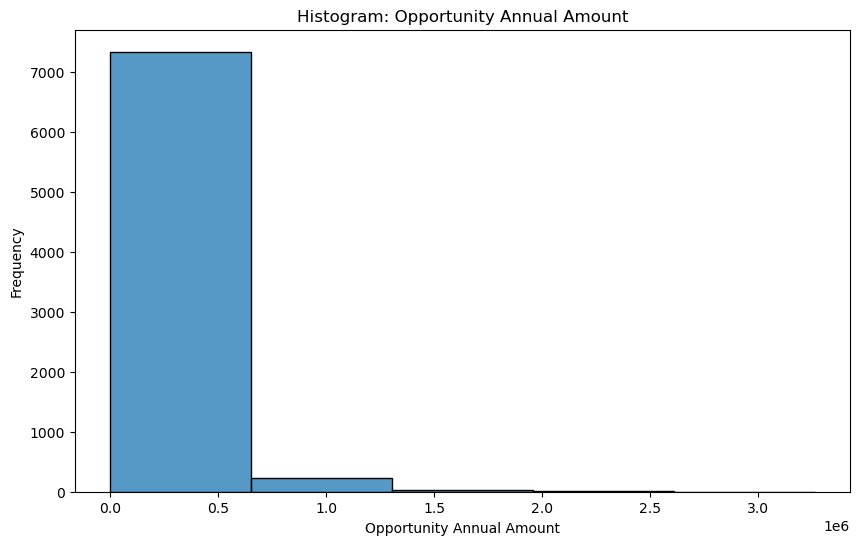

In [102]:
# Create a histogram 
plt.figure(figsize=(10, 6))  
sns.histplot(df['Opportunity_Annual_Amount'], bins=5, edgecolor='black')
plt.xlabel('Opportunity Annual Amount')
plt.ylabel('Frequency')
plt.title('Histogram: Opportunity Annual Amount')
plt.show()


## Question 1

In [103]:
df.head()

,Snapshot_Date,Opportunity_ID,Opportunity_Stage,Opportunity_Type,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Opportunity_Product,Account_Electronic_Medical_Record_System,Account_Hospital_Type,Account_Fiscal_Year_End,Account_State,Account_Zip_Code,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue
0,10/1/19,0064100000TL1Fw,Stage 3 - Pricing,New Business,NaN,9/12/18,11/12/19,Diversion Monitoring,Epic,Childrens Hospital,12/31/23,OH,43205.0,2.0,694.0,2196.0,7282.0,85077078.0,3.652792e+09,2.048661e+09
1,10/1/19,0064100000TKWAx,Stage 3 - Pricing,New Business,NaN,9/7/18,12/12/19,Privacy Monitoring,Epic,Health System,NaN,HI,96813.0,4.0,602.0,1829.0,4443.0,-242188.0,3.560499e+09,1.340713e+09
2,10/1/19,0064100000TKw69,Stage 2 - Scoping,New Business,NaN,9/11/18,4/15/20,Diversion Monitoring,Epic,Health System,NaN,MI,49503.0,10.0,1901.0,4000.0,NaN,982985681.0,7.869236e+09,3.290488e+09
3,10/1/19,0064100000TK0q9,Stage 2 - Scoping,New Business,NaN,8/29/18,2/22/20,Diversion Monitoring,Epic,Health System,NaN,OH,43604.0,12.0,1594.0,2481.0,NaN,165601560.0,1.075654e+10,2.468940e+09
4,10/1/19,0064100000QhXXx,Stage 3 - Pricing,New Business,NaN,6/26/18,12/10/19,Privacy Monitoring,Epic,Health System,NaN,WI,53226.0,10.0,1259.0,2666.0,8197.0,20765609.0,1.024796e+10,3.881722e+09


In [104]:
# Assuming df is your DataFrame
# Convert 'Opportunity_Close_Date' to datetime format with explicit format
df['Opportunity_Close_Date'] = pd.to_datetime(df['Opportunity_Close_Date'], format='%m/%d/%y')
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'], format='%m/%d/%y')
df['Snapshot_Date'] = pd.to_datetime(df['Snapshot_Date'], format='%m/%d/%y')
df.head()

,Snapshot_Date,Opportunity_ID,Opportunity_Stage,Opportunity_Type,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Opportunity_Product,Account_Electronic_Medical_Record_System,Account_Hospital_Type,Account_Fiscal_Year_End,Account_State,Account_Zip_Code,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue
0,2019-10-01,0064100000TL1Fw,Stage 3 - Pricing,New Business,NaN,2018-09-12,2019-11-12,Diversion Monitoring,Epic,Childrens Hospital,12/31/23,OH,43205.0,2.0,694.0,2196.0,7282.0,85077078.0,3.652792e+09,2.048661e+09
1,2019-10-01,0064100000TKWAx,Stage 3 - Pricing,New Business,NaN,2018-09-07,2019-12-12,Privacy Monitoring,Epic,Health System,NaN,HI,96813.0,4.0,602.0,1829.0,4443.0,-242188.0,3.560499e+09,1.340713e+09
2,2019-10-01,0064100000TKw69,Stage 2 - Scoping,New Business,NaN,2018-09-11,2020-04-15,Diversion Monitoring,Epic,Health System,NaN,MI,49503.0,10.0,1901.0,4000.0,NaN,982985681.0,7.869236e+09,3.290488e+09
3,2019-10-01,0064100000TK0q9,Stage 2 - Scoping,New Business,NaN,2018-08-29,2020-02-22,Diversion Monitoring,Epic,Health System,NaN,OH,43604.0,12.0,1594.0,2481.0,NaN,165601560.0,1.075654e+10,2.468940e+09
4,2019-10-01,0064100000QhXXx,Stage 3 - Pricing,New Business,NaN,2018-06-26,2019-12-10,Privacy Monitoring,Epic,Health System,NaN,WI,53226.0,10.0,1259.0,2666.0,8197.0,20765609.0,1.024796e+10,3.881722e+09


In [105]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8844 entries, 0 to 8843
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Snapshot_Date                             8844 non-null   datetime64[ns]
 1   Opportunity_ID                            8844 non-null   object        
 2   Opportunity_Stage                         8844 non-null   object        
 3   Opportunity_Type                          8844 non-null   object        
 4   Opportunity_Annual_Amount                 7606 non-null   float64       
 5   Opportunity_Created_Date                  8844 non-null   datetime64[ns]
 6   Opportunity_Close_Date                    8844 non-null   datetime64[ns]
 7   Opportunity_Product                       8844 non-null   object        
 8   Account_Electronic_Medical_Record_System  8844 non-null   object        
 9   Account_Hospital_Type         

In [67]:
print(df['Opportunity_Stage'].unique())

['Stage 3 - Pricing' 'Stage 2 - Scoping' 'Stage 5 - Contracting'
 'Stage 4 - Verbal / VOC' 'Closed Lost' 'Closed Won'
 'Stage 1 - Evaluating' 'Stage 0 - Prospecting']


In [109]:
# Filter the data for Closed Won opportunities in Q3 2023
closed_won_q3_2023 = df[(df['Opportunity_Stage'] == 'Closed Won') &
                        (df['Opportunity_Close_Date'].dt.year == 2023)]
print(closed_won_q3_2023)
# Calculate the total $ amount closed won in Q3 2023
total_amount_q3_2023 = closed_won_q3_2023['Opportunity_Annual_Amount'].sum()

print(f'Total $ amount closed won in Q3 of 2023: ${total_amount_q3_2023:.2f}')


     Snapshot_Date   Opportunity_ID Opportunity_Stage   Opportunity_Type  \
8128    2023-02-01  0061K00000k1d3r        Closed Won       New Business   
8203    2023-03-01  0061K00000kXvjS        Closed Won       New Business   
8232    2023-03-01  0061K00000kpgFC        Closed Won       New Business   
8279    2023-03-01  0061K00000hxcGf        Closed Won       New Business   
8326    2023-04-01  0061K00000lQnLj        Closed Won       New Business   
8327    2023-04-01  0061K00000lQmFq        Closed Won  Existing Business   
8332    2023-04-01  0061K00000lQDjm        Closed Won       New Business   
8336    2023-04-01  0061K00000ksUL4        Closed Won       New Business   
8383    2023-04-01  0061K00000jVksz        Closed Won  Existing Business   
8388    2023-04-01  0061K00000jTAze        Closed Won       New Business   
8390    2023-04-01  0061K00000ipJJr        Closed Won       New Business   
8408    2023-04-01  0061K00000eHxr4        Closed Won       New Business   
8592    2023

In [108]:
# Filter the data for Closed Won opportunities in Q3 2023
closed_won_q3_2023 = df[(df['Opportunity_Stage'] == 'Closed Won') &
                        (df['Opportunity_Close_Date'].dt.year == 2023) &
                        (df['Opportunity_Close_Date'].dt.quarter == 3)]

# Calculate the total $ amount
total_amount_closed_won_q3_2023 = closed_won_q3_2023['Opportunity_Annual_Amount'].sum()

# Print the result
print(f"Total $ amount closed won in Q3 of 2023: ${total_amount_closed_won_q3_2023:.2f}")


Total $ amount closed won in Q3 of 2023: $0.00
